In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
#abro el data frame
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Voy a hacer un analisis por location

In [3]:
datos.location.describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [4]:
datos.location.shape

(7613,)

In [5]:
#Agrego una columna con la longitud de los tweets ya que la voy a necsitar luego
datos['longitudTweet']=datos.text.str.len()
datos.head()

,id,keyword,location,text,target,longitudTweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [6]:
datos.location.isna().sum()

2533

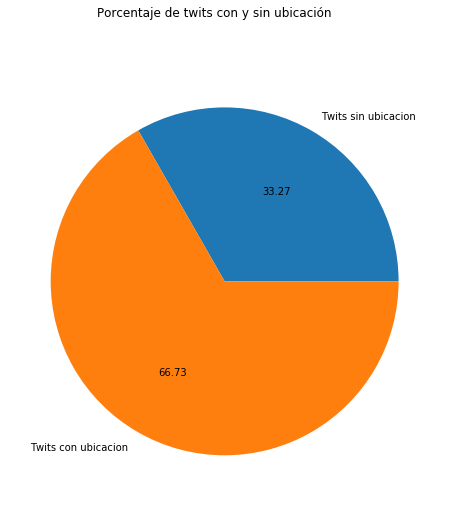

In [7]:
#hago un grafico de torta mostrando la cantidad de cuentas que tienen una location asociada
sinLocation=datos.location.isna().sum()*100/datos.location.shape[0]
plt.figure(figsize=(12, 8))
plt.pie(x=[sinLocation,100-sinLocation],labels=['Twits sin ubicacion','Twits con ubicacion'],
        autopct="%.2f")
plt.suptitle("Porcentaje de twits con y sin ubicación")
plt.show()

Analizo el porcentaje de veracidad de los twits con ubicacion

In [8]:
conUbicacion =  datos[datos['location'].notna()]
conUbicacion.describe()

,id,target,longitudTweet
count,5080.000000,5080.000000,5080.000000
mean,5407.112598,0.432283,102.740157
std,3116.359041,0.495442,33.678942
min,48.000000,0.000000,8.000000
25%,2728.750000,0.000000,79.000000
50%,5360.500000,0.000000,109.000000
75%,8086.000000,1.000000,135.000000
max,10833.000000,1.000000,163.000000


In [9]:
propTrue = conUbicacion.target.sum()*100/conUbicacion.target.count()
propTrue

43.22834645669291

In [10]:
#Selecciono twits que tengan location no unicos, ya que considero que los unicos pueden no ser lugares reales
propTrueDobles = conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].target.sum()*100/conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].target.count()
propTrueDobles

48.36427939876216

In [11]:
#Hago lo mismo para los twits con ubicacion nula 
sinUbicacion =  datos[datos['location'].isnull()]
sinUbicacion.describe()

,id,target,longitudTweet
count,2533.000000,2533.000000,2533.000000
mean,5511.771812,0.424398,98.893802
std,3177.805626,0.494349,34.687788
min,1.000000,0.000000,7.000000
25%,2757.000000,0.000000,75.000000
50%,5535.000000,0.000000,104.000000
75%,8247.000000,1.000000,132.000000
max,10873.000000,1.000000,158.000000


In [12]:
#Selecciono twits que tengan location no unicos, ya que considero que los unicos pueden no ser lugares reales
propTrueSinUb = sinUbicacion[sinUbicacion.duplicated(subset=['location'],keep=False)].target.sum()*100/sinUbicacion[sinUbicacion.duplicated(subset=['location'],keep=False)].target.count()
propTrueSinUb

42.43979470983024

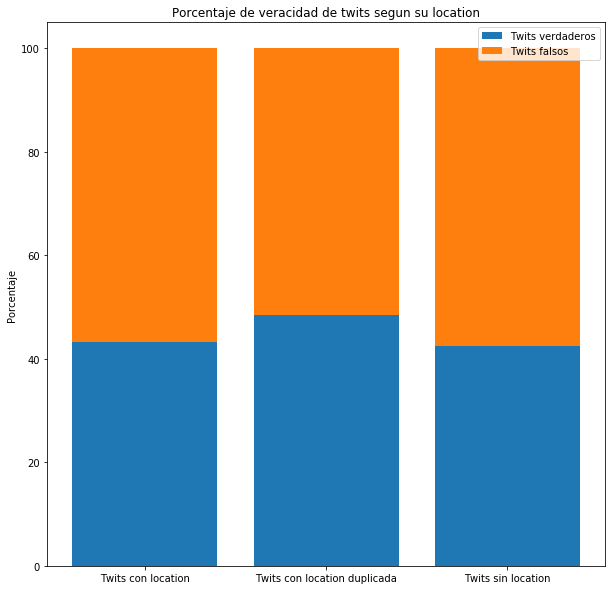

In [13]:
#hago un grafico de stacked bar 
fig, ax = plt.subplots(figsize=(10,10))
labels = ['Twits con location','Twits con location duplicada','Twits sin location']
porcentajesTrue = [propTrue,propTrueDobles,propTrueSinUb]
porcentajesFalse = [100-x for x in porcentajesTrue]
ax.bar(labels, porcentajesTrue,  label='Twits verdaderos')
ax.bar(labels, porcentajesFalse,  bottom=porcentajesTrue,
       label='Twits falsos')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de veracidad de twits segun su location')
ax.legend()

plt.show()

Analizo la longitud promedio de los twits dependiendon si tienen un location o no

In [14]:
meanMinMaxSinUb =sinUbicacion.describe()
meanMinMaxSinUb

,id,target,longitudTweet
count,2533.000000,2533.000000,2533.000000
mean,5511.771812,0.424398,98.893802
std,3177.805626,0.494349,34.687788
min,1.000000,0.000000,7.000000
25%,2757.000000,0.000000,75.000000
50%,5535.000000,0.000000,104.000000
75%,8247.000000,1.000000,132.000000
max,10873.000000,1.000000,158.000000


In [23]:
meanMinMaxConUb =conUbicacion.describe()
meanMinMaxConUb

,id,target,longitudTweet
count,5080.000000,5080.000000,5080.000000
mean,5407.112598,0.432283,102.740157
std,3116.359041,0.495442,33.678942
min,48.000000,0.000000,8.000000
25%,2728.750000,0.000000,79.000000
50%,5360.500000,0.000000,109.000000
75%,8086.000000,1.000000,135.000000
max,10833.000000,1.000000,163.000000


In [30]:
meanMinMaxConUbDupl = conUbicacion[conUbicacion.duplicated(subset=['location'],keep=False)].describe()
meanMinMaxConUbDupl

,id,target,longitudTweet
count,2262.000000,2262.000000,2262.000000
mean,5378.631300,0.483643,107.429708
std,3119.597675,0.499843,31.233992
min,48.000000,0.000000,9.000000
25%,2761.750000,0.000000,87.000000
50%,5351.500000,0.000000,114.000000
75%,7991.750000,1.000000,136.000000
max,10825.000000,1.000000,163.000000


In [28]:
dfPlotBox = pd.concat([meanMinMaxSinUb['longitudTweet'], meanMinMaxConUb['longitudTweet'],meanMinMaxConUbDupl['longitudTweet']], axis=1, keys=['Sin Ubicacion', 'Con Ubicacion','Con ubicacion duplicada'])

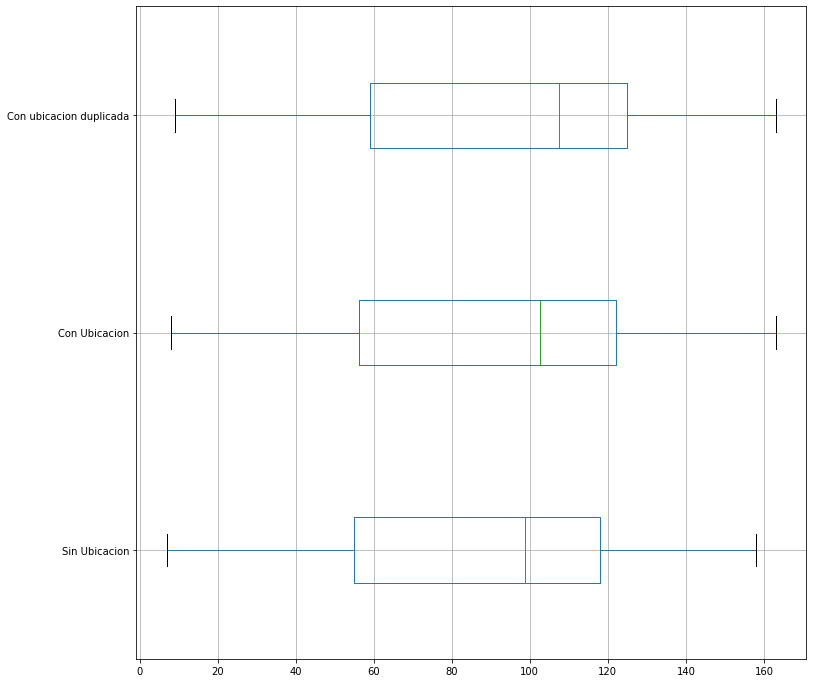

In [31]:
dfPlotBox.drop(['count']).boxplot(figsize=(12,12),vert=False)

Analizo la longitud promedio de los twits con ubicacion

In [18]:
sinUbicacion.groupby('id')['longitudTweet'].agg(['min','max','mean'])

,min,max,mean
id,,,
1,69,69,69
4,38,38,38
5,133,133,133
6,65,65,65
7,88,88,88
...,...,...,...
10869,83,83,83
10870,125,125,125
10871,65,65,65
